In [93]:
import json
import urllib
import pandas as pd
import pickle
import datetime as dt
from pandas import DataFrame, Series

url = 'http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/352409?res=3hourly&key=1048a1c2-d53f-4e66-b614-48740f6fa09f'
response = urllib.urlopen(url)
data = json.load(response)

with open('C:\\Users\\Student30\\Documents\\Met Data project\\met data files\\varcleanmetoffice', 'rb') as p1:
    frame = pickle.load(p1)

origin = data.get('SiteRep', 'none').get('DV', 'none').get('dataDate', 'none')
y = int(origin[0:4])
m = int(origin[5:7])
d = int(origin[8:10])
h = int(origin[11:13])
origin = dt.datetime(y,m,d,h,0,0)
period = data.get('SiteRep', 'none').get('DV', 'none').get('Location').get('Period', 'none')
inctime = dt.datetime(y,m,d,h-3,0,0)
listy = []
for i in period:
    rep = i.get('Rep')
    for j in rep:
        inctime += dt.timedelta(hours = 3)
        listy = [inctime, origin, j.get('$'), j.get('D'), j.get('F'), j.get('G'), j.get('H'), j.get('Pp'), j.get('S'), j.get('T'), j.get('U'), j.get('V'), j.get('W')]
        frame = frame.append(Series(listy, index = ['Forecast Time','origin','UTC', 'Wind Direction', 'Degrees Celsius', 'Wind Gust (MPH)', 'Humidity', 'Precipitation', 'Wind Speed', 'Screen Temp', 'UV index', 'Visibility', 'Weather']), ignore_index = True)

with open('C:\\Users\\Student30\\Documents\\Met Data project\\met data files\\varcleanmetoffice', 'wb') as p2:
    pickle.dump(frame, p2)

In [177]:
frame


,Forecast Time,origin,UTC,Wind Direction,Degrees Celsius,Wind Gust (MPH),Humidity,Precipitation,Wind Speed,Screen Temp,UV index,Visibility,Weather,date2
0,2016-12-06 16:00:00,2016-12-06 16:00:00,720,SSE,8,9,97,17,4,8,1,PO,5,2016-12-06
1,2016-12-06 19:00:00,2016-12-06 16:00:00,900,S,9,11,90,18,2,10,1,MO,8,2016-12-06
2,2016-12-06 22:00:00,2016-12-06 16:00:00,1080,SSW,8,11,96,10,4,9,0,MO,8,2016-12-06
3,2016-12-07 01:00:00,2016-12-06 16:00:00,1260,SSW,8,11,97,12,4,9,0,MO,8,2016-12-06
4,2016-12-07 04:00:00,2016-12-06 16:00:00,0,SSW,8,11,97,10,4,9,0,MO,8,2016-12-06
5,2016-12-07 07:00:00,2016-12-06 16:00:00,180,SSW,8,13,97,10,7,9,0,MO,8,2016-12-06
6,2016-12-07 10:00:00,2016-12-06 16:00:00,360,SSW,8,16,98,10,7,9,0,MO,8,2016-12-06
7,2016-12-07 13:00:00,2016-12-06 16:00:00,540,SW,8,18,94,9,7,10,1,MO,8,2016-12-06
8,2016-12-07 16:00:00,2016-12-06 16:00:00,720,SSW,9,20,89,4,9,11,1,MO,7,2016-12-06
9,2016-12-07 19:00:00,2016-12-06 16:00:00,900,SSW,10,20,84,4,9,11,1,MO,7,2016-12-06


In [95]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [117]:
frame.describe()

,Forecast Time,origin,UTC,Wind Direction,Degrees Celsius,Wind Gust (MPH),Humidity,Precipitation,Wind Speed,Screen Temp,UV index,Visibility,Weather
count,453,453,453,453,453,453,453,453,453,453,453,453,453
unique,267,12,8,16,17,12,33,60,5,15,2,5,14
top,2016-12-11 23:00:00,2016-12-07 07:00:00,720,SW,8,13,92,10,7,12,0,GO,8
freq,4,39,60,107,64,76,70,53,159,76,275,219,183
first,2016-12-06 16:00:00,2016-12-06 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-01-09 02:00:00,2017-01-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
frame['date2'] = frame['origin'].map(lambda x: str(x)[:-9])

In [161]:
frame

,Forecast Time,origin,UTC,Wind Direction,Degrees Celsius,Wind Gust (MPH),Humidity,Precipitation,Wind Speed,Screen Temp,UV index,Visibility,Weather,date2
0,2016-12-06 16:00:00,2016-12-06 16:00:00,720,SSE,8,9,97,17,4,8,1,PO,5,2016-12-06
1,2016-12-06 19:00:00,2016-12-06 16:00:00,900,S,9,11,90,18,2,10,1,MO,8,2016-12-06
2,2016-12-06 22:00:00,2016-12-06 16:00:00,1080,SSW,8,11,96,10,4,9,0,MO,8,2016-12-06
3,2016-12-07 01:00:00,2016-12-06 16:00:00,1260,SSW,8,11,97,12,4,9,0,MO,8,2016-12-06
4,2016-12-07 04:00:00,2016-12-06 16:00:00,0,SSW,8,11,97,10,4,9,0,MO,8,2016-12-06
5,2016-12-07 07:00:00,2016-12-06 16:00:00,180,SSW,8,13,97,10,7,9,0,MO,8,2016-12-06
6,2016-12-07 10:00:00,2016-12-06 16:00:00,360,SSW,8,16,98,10,7,9,0,MO,8,2016-12-06
7,2016-12-07 13:00:00,2016-12-06 16:00:00,540,SW,8,18,94,9,7,10,1,MO,8,2016-12-06
8,2016-12-07 16:00:00,2016-12-06 16:00:00,720,SSW,9,20,89,4,9,11,1,MO,7,2016-12-06
9,2016-12-07 19:00:00,2016-12-06 16:00:00,900,SSW,10,20,84,4,9,11,1,MO,7,2016-12-06


In [221]:
frame['Degrees Celsius'] = frame['Degrees Celsius'].astype(float)

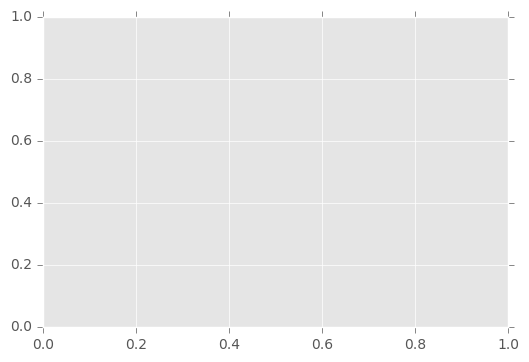

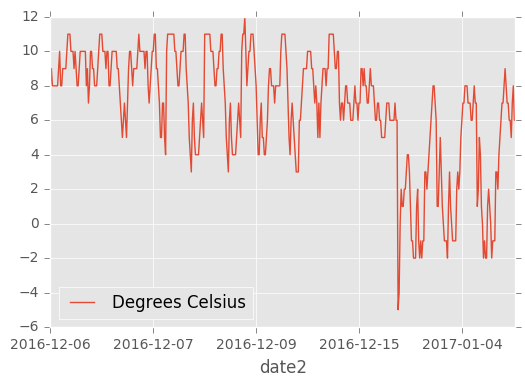

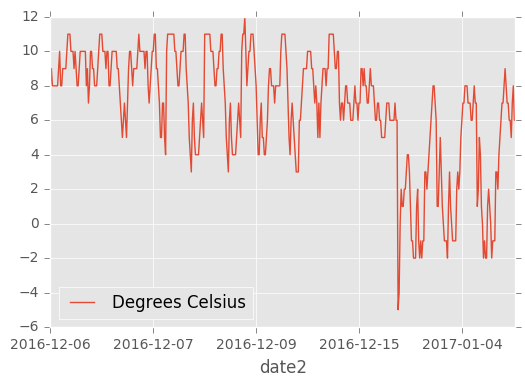

In [223]:
frame.plot(x='date2',y='Degrees Celsius',kind='line')
plt.show()

In [203]:
npArray = np.array(frame)
print npArray.shape

(453L, 14L)


In [204]:
Y = npArray[:,(4,13)]

In [205]:
Y

array([[u'8', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'11', '2016-12-06'],
       [u'11', '2016-12-06'],
       [u'11', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'8', '2016-12-06'],
       [u'9', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],
       [u'10', '2016-12-06'],


In [105]:
import matplotlib.pyplot as plt

In [150]:
from datetime import datetime


In [193]:
Johnm = Y.tolist()

In [195]:
Johnm

[[u'8', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'11', '2016-12-06'],
 [u'11', '2016-12-06'],
 [u'11', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'9', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'10', '2016-12-06'],
 [u'8', '2016-12-06'],
 [u'9', '2016-12-07'],
 [u'7', '2016-12-07'],
 [u'8', '2016-12-07'],
 [u'10', '2016-12-07'],
 [u'10', '2016-12-07'],
 [u'9', '2016-12-07'],
 [u'9', '2016-12-

In [214]:
plt.plot(list(Y[:,0]),Y[:,1])
plt.ylabel('some numbers')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'find'

In [225]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\Student30\\Documents\\Met Data project'